## Names
Rafael Epplee & Hans Ole Hatzel

- We used an alpha value of 0.5, though 0.05 also produced a correct solution for the provided examples
- our trained model is `[ 13.34776379  -2.25037797   5.46508627]`

In [112]:
theta = (np.random.rand(3) * 0.02) - 0.01
alpha = 0.5

theta [ 0.00834336 -0.00975104  0.0008259 ]
trained theta [ 13.34778445  -2.25038127   5.46509357]


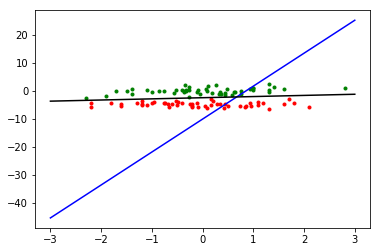

In [113]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi

dtypes = {'names': ('x', 'y', 'class'), 'formats': ('f16', 'f16', 'f16')}
data = np.loadtxt("data.txt", delimiter=" ", dtype=dtypes)

def plot(data, cls, color):
    filtered = np.array([(x, y, c) for x, y, c in data if c == cls], dtype=dtypes)
    plt.scatter(filtered['x'], filtered['y'], c=color, marker='.')
    
def hyp(theta, x):
    return logistic(theta.dot(x))

def plot_fn(fn, xs, color='black'):
    ys = []
    for x in xs:
        ys.append(fn(x))
    plt.plot(xs, ys, color)
    
def plot_hyp(theta, color):
    plot_fn(lambda x: (theta[0] + theta[1]*x)*(-1/theta[2]), range(-3, 4), color)

def logistic(z):
    return 1/(1+np.exp(-z))


print("theta", theta)

plot_hyp(theta, 'blue')
iterations = 100
trained_theta = np.copy(theta)
for iteration in range(iterations):
    for example in data:
        new_theta = np.copy(trained_theta)
        for j in range(len(theta)):
            x = (1, example['x'], example['y'])
            y = example['class']
            new_theta[j] = trained_theta[j] + (alpha * (y - hyp(trained_theta, x)) * x[j])
        trained_theta = new_theta

plot(data, 1, 'green')
plot(data, 0, 'red')
plot_hyp(trained_theta, 'black')
print("trained theta", trained_theta)